<a href="https://colab.research.google.com/github/vgallegod/Senales-y-sistemas/blob/main/Taller3_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Taller 3, parte dos.

**1.7 Encuentre la función de transferencia en lazo abierto para un circuito RLC serie (entrada tensión de alimentación - salida tensión en el capacitor) y un circuito RCL en paralelo (entrada corriente de alimentación - salida corriente en el inductor). Nota: tenga en cuenta las condiciones iniciales del sistema según lo explicado en el material de apoyo Circuito RLC y Análisis de redes eléctricas.**

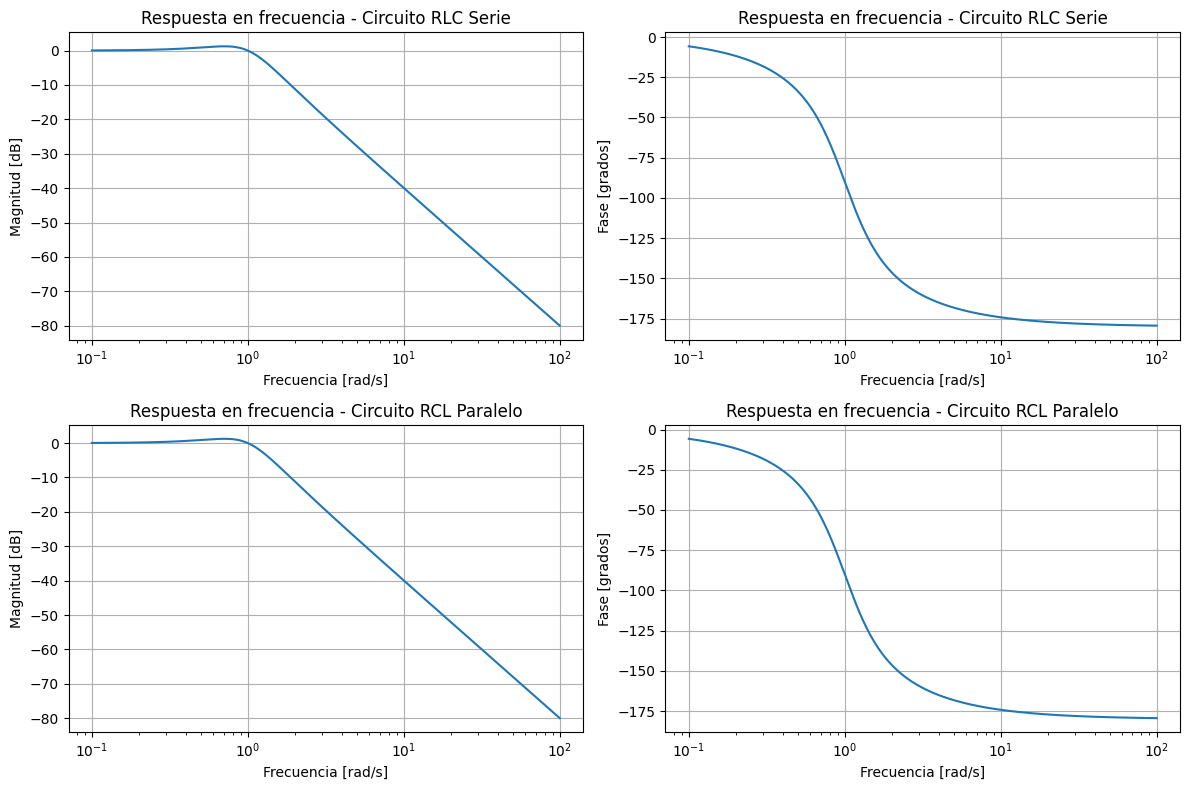

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definición de parámetros para los circuitos
R = 1.0    # Resistencia en ohmios
L = 1.0    # Inductancia en henrios
C = 1.0    # Capacitancia en faradios

# Función de transferencia para el circuito RLC serie
num_RLC_serie = [1]                # Numerador: 1
den_RLC_serie = [L*C, R*C, 1]      # Denominador: s^2*LC + s*RC + 1
sys_RLC_serie = signal.TransferFunction(num_RLC_serie, den_RLC_serie)

# Función de transferencia para el circuito RCL paralelo
num_RCL_paralelo = [1]             # Numerador: 1
den_RCL_paralelo = [L/R, 1, L*C]   # Denominador: s*L/R + 1 + s^2*LC
sys_RCL_paralelo = signal.TransferFunction(num_RCL_paralelo, den_RCL_paralelo)

# Frecuencias para análisis
frequencias = np.logspace(-1, 2, 500)  # de 0.1 a 100 rad/s

# Respuesta en frecuencia
w, mag_RLC_serie, phase_RLC_serie = signal.bode(sys_RLC_serie, w=frequencias)
w, mag_RCL_paralelo, phase_RCL_paralelo = signal.bode(sys_RCL_paralelo, w=frequencias)

# Gráficos de respuesta en frecuencia
plt.figure(figsize=(12, 8))

# Magnitud del circuito RLC serie
plt.subplot(2, 2, 1)
plt.semilogx(w, mag_RLC_serie)
plt.title('Respuesta en frecuencia - Circuito RLC Serie')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

# Fase del circuito RLC serie
plt.subplot(2, 2, 2)
plt.semilogx(w, phase_RLC_serie)
plt.title('Respuesta en frecuencia - Circuito RLC Serie')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Fase [grados]')
plt.grid(True)

# Magnitud del circuito RCL paralelo
plt.subplot(2, 2, 3)
plt.semilogx(w, mag_RCL_paralelo)
plt.title('Respuesta en frecuencia - Circuito RCL Paralelo')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

# Fase del circuito RCL paralelo
plt.subplot(2, 2, 4)
plt.semilogx(w, phase_RCL_paralelo)
plt.title('Respuesta en frecuencia - Circuito RCL Paralelo')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Fase [grados]')
plt.grid(True)

plt.tight_layout()
plt.show()


**1.8 Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresión de la salida en el tiempo para una configuración en lazo cerrado del sis-tema, en función de *R, L* y *C,* para las siguientes entradas:
*i) impulso, ii) escalón unitario, y iv) rampa*. Compruebe los resultados en simulación sobre Python (utilizando sympy) y grafique la señal de salida para cada caso. Ver cuaderno de ayuda Fracciones parciales Circuito RLC.**

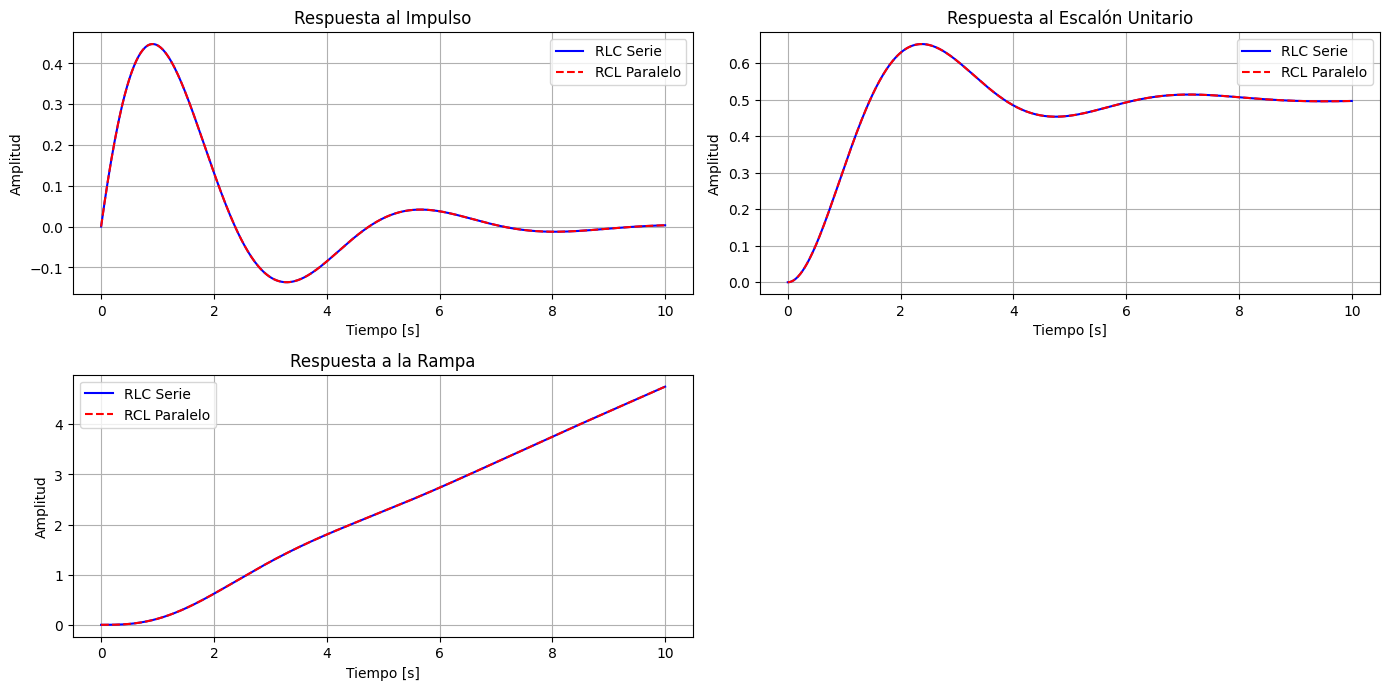

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, exp, Heaviside, laplace_transform, inverse_laplace_transform

# Definir variables
t, s = symbols('t s')
R, L, C = symbols('R L C')

# Función de transferencia en lazo cerrado para el circuito RLC serie
H_closed_RLC_serie = 1 / (s**2 * L * C + s * R * C + 2)

# Función de transferencia en lazo cerrado para el circuito RCL paralelo
H_closed_RCL_paralelo = 1 / (s * L / R + 2 + s**2 * L * C)

# Definir las entradas
X_impulso = 1
X_escalon = 1 / s
X_rampa = 1 / s**2

# Calcular respuestas en el tiempo para cada entrada y circuito
Y_impulso_RLC_serie = inverse_laplace_transform(H_closed_RLC_serie * X_impulso, s, t)
Y_impulso_RCL_paralelo = inverse_laplace_transform(H_closed_RCL_paralelo * X_impulso, s, t)

Y_escalon_RLC_serie = inverse_laplace_transform(H_closed_RLC_serie * X_escalon, s, t)
Y_escalon_RCL_paralelo = inverse_laplace_transform(H_closed_RCL_paralelo * X_escalon, s, t)

Y_rampa_RLC_serie = inverse_laplace_transform(H_closed_RLC_serie * X_rampa, s, t)
Y_rampa_RCL_paralelo = inverse_laplace_transform(H_closed_RCL_paralelo * X_rampa, s, t)

# Evaluar respuestas en el tiempo para un rango de t
t_vals = np.linspace(0, 10, 500)

# Define numerical values for R, L, and C
R_val = 1.0
L_val = 1.0
C_val = 1.0

y_impulso_RLC_serie = [Y_impulso_RLC_serie.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_impulso_RCL_paralelo = [Y_impulso_RCL_paralelo.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_escalon_RLC_serie = [Y_escalon_RLC_serie.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_escalon_RCL_paralelo = [Y_escalon_RCL_paralelo.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_rampa_RLC_serie = [Y_rampa_RLC_serie.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_rampa_RCL_paralelo = [Y_rampa_RCL_paralelo.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]

# Graficar respuestas en el tiempo
plt.figure(figsize=(14, 10))


# Impulso
plt.subplot(3, 2, 1)
plt.plot(t_vals, y_impulso_RLC_serie, label='RLC Serie', color='blue')
plt.plot(t_vals, y_impulso_RCL_paralelo, label='RCL Paralelo', color='red', linestyle='--')
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Escalón unitario
plt.subplot(3, 2, 2)
plt.plot(t_vals, y_escalon_RLC_serie, label='RLC Serie', color='blue')
plt.plot(t_vals, y_escalon_RCL_paralelo, label='RCL Paralelo', color='red', linestyle='--')
plt.title('Respuesta al Escalón Unitario')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Rampa
plt.subplot(3, 2, 3)
plt.plot(t_vals, y_rampa_RLC_serie, label='RLC Serie', color='blue')
plt.plot(t_vals, y_rampa_RCL_paralelo, label='RCL Paralelo', color='red', linestyle='--')
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**1.9 Consulte en qué consiste un sistema subamortiguado, sobre-amortiguado, y de amortiguamiento crítico. Genere simulaciones para ejemplificar cada uno de los casos con los sistemas R,L ,C serie y paralelo estudiados. Nota: asuma condiciones iniciales cero.**

**Sistema Subamortiguado:**

**Descripción:** Un sistema es subamortiguado si tiene un amortiguamiento insuficiente. La respuesta muestra oscilaciones antes de alcanzar el estado estable. La razón de las oscilaciones es que los polos del sistema están en el semiplano izquierdo, pero no están en la parte real (es decir, tienen parte imaginaria no nula).

**Condiciones:** La relación entre el coeficiente de amortiguamiento $(
ζ)$ y la frecuencia natural $(
𝜔
𝑛
​
 )$ es tal que
$0
<
𝜁
<
1
.$

**Sistema Sobreamortiguado:**

**Descripción:** Un sistema es sobreamortiguado si el amortiguamiento es excesivo. La respuesta vuelve al estado estable sin oscilaciones, pero más lentamente que en el caso de amortiguamiento crítico. En este caso, los polos están en el semiplano izquierdo, y ambos tienen parte real negativa.

**Condiciones:** La relación entre el coeficiente de amortiguamiento $(
𝜁
)$ y la frecuencia natural $(
𝜔
𝑛
​
 )$ es tal que
$
ζ>1.$

**Sistema de Amortiguamiento Crítico:**

**Descripción:** Un sistema tiene amortiguamiento crítico cuando el amortiguamiento es justo suficiente para evitar las oscilaciones, pero no tan alto como para hacer que la respuesta sea excesivamente lenta. La respuesta es la más rápida posible sin oscilaciones.

**Condiciones:** La relación entre el coeficiente de amortiguamiento $(
ζ)$ y la frecuencia natural $(
𝜔
𝑛
 )$ es tal que
$
ζ=1.$

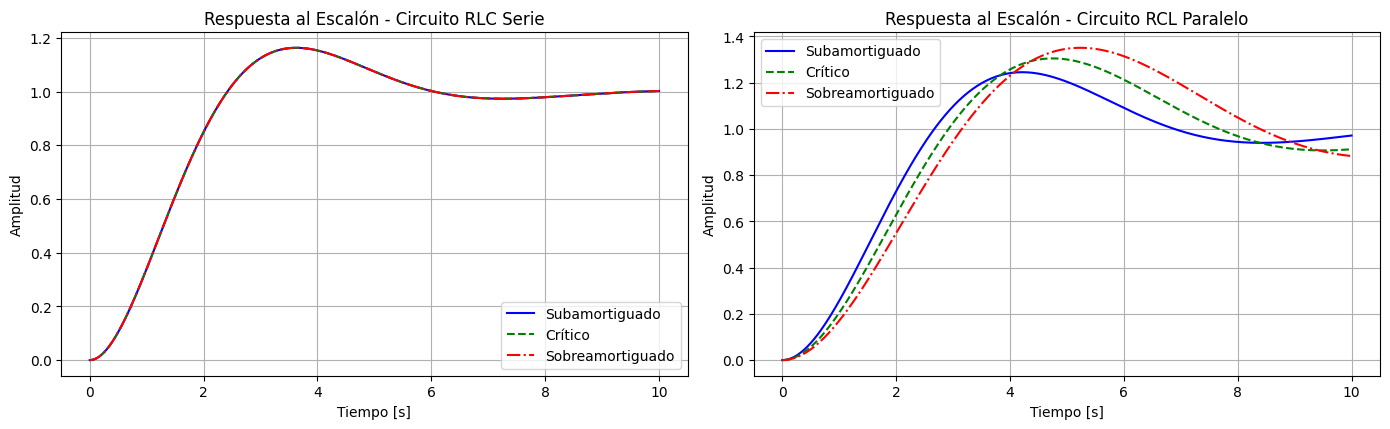

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir parámetros del circuito
R = 1.0    # Resistencia en ohmios
L = 1.0    # Inductancia en henrios
C = 1.0    # Capacitancia en faradios

# Cálculo de parámetros de amortiguamiento
omega_n = 1 / np.sqrt(L * C)  # Frecuencia natural
zeta_subamortiguado = 0.5  # Coeficiente de amortiguamiento subamortiguado
zeta_critico = 1.0  # Coeficiente de amortiguamiento crítico
zeta_sobreamortiguado = 1.5  # Coeficiente de amortiguamiento sobreamortiguado

# Función de transferencia para circuito RLC serie
def tf_RLC_serie(zeta):
    num = [1]
    den = [L * C, R * C, 1]
    sys = signal.TransferFunction(num, den)
    return sys

# Función de transferencia para circuito RCL paralelo
def tf_RCL_paralelo(zeta):
    num = [1]
    den = [L/R + zeta * omega_n, 1, L * C]
    sys = signal.TransferFunction(num, den)
    return sys

# Tiempo de simulación
t = np.linspace(0, 10, 500)

# Respuestas en el tiempo para el circuito RLC serie
sys_serie_subamortiguado = tf_RLC_serie(zeta_subamortiguado)
sys_serie_critico = tf_RLC_serie(zeta_critico)
sys_serie_sobreamortiguado = tf_RLC_serie(zeta_sobreamortiguado)

#The signal.step function returns a tuple of two values when the system is continuous
t, y_serie_subamortiguado = signal.step(sys_serie_subamortiguado, T=t)
t, y_serie_critico = signal.step(sys_serie_critico, T=t)
t, y_serie_sobreamortiguado = signal.step(sys_serie_sobreamortiguado, T=t)

# Respuestas en el tiempo para el circuito RCL paralelo
sys_paralelo_subamortiguado = tf_RCL_paralelo(zeta_subamortiguado)
sys_paralelo_critico = tf_RCL_paralelo(zeta_critico)
sys_paralelo_sobreamortiguado = tf_RCL_paralelo(zeta_sobreamortiguado)

t, y_paralelo_subamortiguado = signal.step(sys_paralelo_subamortiguado, T=t)
t, y_paralelo_critico = signal.step(sys_paralelo_critico, T=t)
t, y_paralelo_sobreamortiguado = signal.step(sys_paralelo_sobreamortiguado, T=t)

# Graficar respuestas en el tiempo
plt.figure(figsize=(14, 12))


# Respuesta al escalón - Circuito RLC Serie
plt.subplot(3, 2, 1)
plt.plot(t, y_serie_subamortiguado, label='Subamortiguado', color='blue')
plt.plot(t, y_serie_critico, label='Crítico', color='green', linestyle='--')
plt.plot(t, y_serie_sobreamortiguado, label='Sobreamortiguado', color='red', linestyle='-.')
plt.title('Respuesta al Escalón - Circuito RLC Serie')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Respuesta al escalón - Circuito RCL Paralelo
plt.subplot(3, 2, 2)
plt.plot(t, y_paralelo_subamortiguado, label='Subamortiguado', color='blue')
plt.plot(t, y_paralelo_critico, label='Crítico', color='green', linestyle='--')
plt.plot(t, y_paralelo_sobreamortiguado, label='Sobreamortiguado', color='red', linestyle='-.')
plt.title('Respuesta al Escalón - Circuito RCL Paralelo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**1.10 Para los sitemas del punto 1.9, encuentre las expresiones para el factor de amortiguamiento §, la frecuencia natural no amortiguada un, y la frecuencia natural amortiguada wa en función de R, L, y C. Nota: asuma condiciones iniciales cero.**

In [ ]:
import numpy as np

# Definir parámetros
R = 1.0  # Resistencia en ohmios
L = 1.0  # Inductancia en henrios
C = 1.0  # Capacitancia en faradios

# Calcular frecuencia natural no amortiguada
omega_n = 1 / np.sqrt(L * C)

# Calcular factor de amortiguamiento
zeta = R / (2 * np.sqrt(L / C))

# Calcular frecuencia natural amortiguada
omega_a = omega_n * np.sqrt(1 - zeta**2)

print(f"Frecuencia Natural No Amortiguada (omega_n): {omega_n:.2f} rad/s")
print(f"Factor de Amortiguamiento (zeta): {zeta:.2f}")
print(f"Frecuencia Natural Amortiguada (omega_a): {omega_a:.2f} rad/s")


Frecuencia Natural No Amortiguada (omega_n): 1.00 rad/s
Factor de Amortiguamiento (zeta): 0.50
Frecuencia Natural Amortiguada (omega_a): 0.87 rad/s
